In this last homework I am going to do some run several feature selection algorithms in order to determine the best 7 features out of 11 which may be used to successfully predict quality of wine, ranging from 0 to 10 points.

The data is taken from https://archive.ics.uci.edu/ml/datasets/wine+quality . There were two datasets, with red and white wine, I've decided to take both. It got me almost 6.5k of observations.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

red = pd.read_csv('winequality-red.csv', delimiter = ';', encoding = "utf8")
white = pd.read_csv('winequality-white.csv', delimiter = ';', encoding = "utf8")

red['wine'] = 'red'
white['wine'] = 'white'

wine = pd.concat([red, white])
num_rows, num_feature = wine.shape

print('row number: ', num_rows)
print('feature number: ', num_feature)
print('names of features: ', list(wine))

row number:  6497
feature number:  13
names of features:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine']


In [2]:
 wine.head(10) #take a look

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [3]:
print('number of non NUN elements(%):', wine.count()*100/num_rows) #check if there are any NAs
#all columns are filled up

number of non NUN elements(%): fixed acidity           100.0
volatile acidity        100.0
citric acid             100.0
residual sugar          100.0
chlorides               100.0
free sulfur dioxide     100.0
total sulfur dioxide    100.0
density                 100.0
pH                      100.0
sulphates               100.0
alcohol                 100.0
quality                 100.0
wine                    100.0
dtype: float64


In [4]:
wine.info() #check for the data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
wine                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


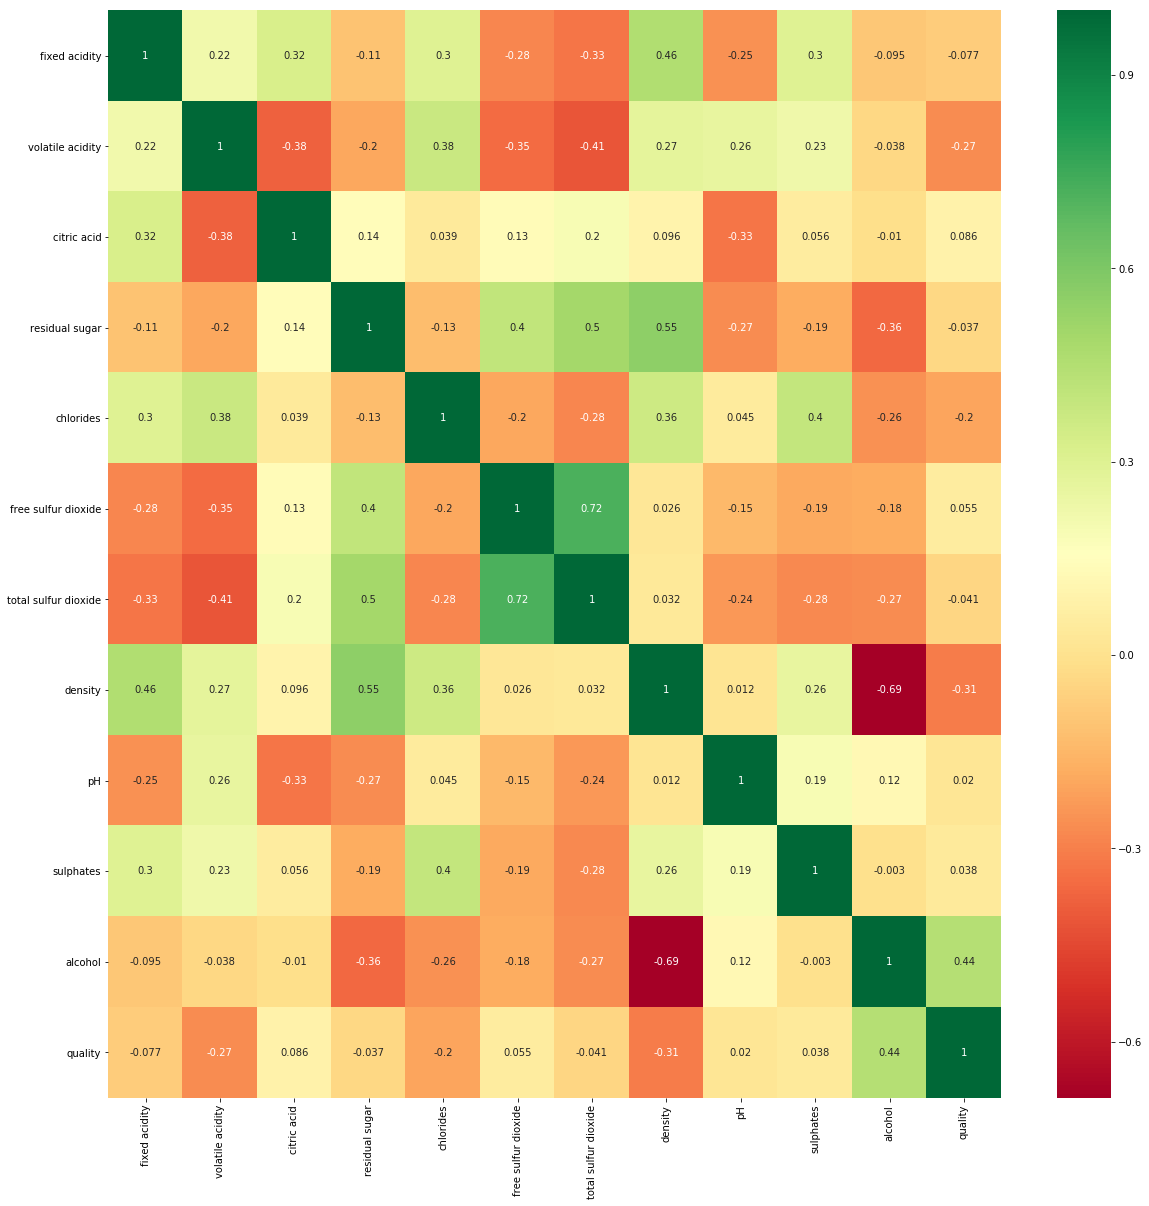

In [5]:
#build a heatmap showing correlation between all pairs of features
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
#get correlations of each features in dataset
corrmat = wine.corr()
corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(wine[corr_features].corr(),annot=True,cmap="RdYlGn")

Searching for the best features with univariate selection (based on chi-square value)

Lenth of array X:  6497
Size of data before:  (6497, 11)


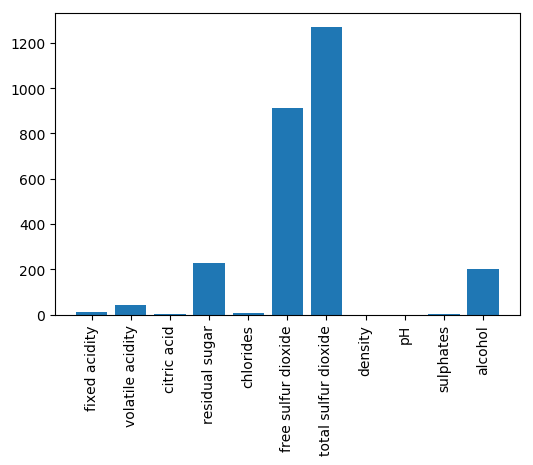

The size of new the array:  (6497, 7)
----------------------------------


{11.115117554127202: 'fixed acidity',
 42.528979919277816: 'volatile acidity',
 225.65715087940836: 'residual sugar',
 6.388649932258003: 'chlorides',
 913.3328323216028: 'free sulfur dioxide',
 1269.9741076364144: 'total sulfur dioxide',
 201.36919507340772: 'alcohol'}

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Y = wine[['quality']].values

X = wine[['fixed acidity', 'volatile acidity', 
          'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
          'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values

print('Lenth of array X: ', len(X))

feature_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

print('Size of data before: ', X.shape)

my_test = SelectKBest(chi2, k=7)
my_fit = my_test.fit(X, Y)

np.set_printoptions(precision=3)
    
scores =  my_fit.scores_
# Plot the scores.  
plt.figure(dpi=100)
plt.bar(range(len(feature_list)), scores)
plt.xticks(range(len(feature_list)), feature_list, rotation='vertical')
plt.show()    
    
    
X_new = my_fit.transform(X) #new data with 7 features
new_list = my_fit.get_support(indices=True)

print('The size of new the array: ', X_new.shape)
print('----------------------------------')

my_dict = {}

for i in range(len(new_list)):
    j = new_list[i]
    my_dict.update({my_fit.scores_[j]: feature_list[j]}) 

my_dict # dsiplay 7 best selected features

In [7]:
mylist3 = list(my_dict.values())
mylist3 # transformed into a list

['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'alcohol']

Searching for the best features using recursive feature elimination (RFE) 

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)


YY = Y.ravel()

# setting a model that will be used in the process of feature elimination by their importance
lr = LinearRegression()

n_features_to_select = 7
step=1

rfe = RFE(lr, n_features_to_select = 7, step=1) #setting parameters of RFE
fit = rfe.fit(x_scaled, YY) 

print('number of importante feature: ', rfe.n_features_)
print('---------------------------------------')
print('Feature rank: ', rfe.ranking_)

mylist1 = []
# list of features and scores
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(feature_list[i],' - ', rfe.ranking_[i])
        mylist1.append(feature_list[i])

number of importante feature:  7
---------------------------------------
Feature rank:  [2 1 5 1 4 1 1 1 3 1 1]
volatile acidity  -  1
residual sugar  -  1
free sulfur dioxide  -  1
total sulfur dioxide  -  1
density  -  1
sulphates  -  1
alcohol  -  1


In [9]:
#the same RFE but with cross-validation included

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
svr = SVR(kernel="linear")
selector = RFECV(svr, step=1, cv=5)
selector = selector.fit(x_scaled, YY)

print('number of important features: ', selector.n_features_)
print('---------------------------------------')
print('Feature rang: ', selector.ranking_)

mylist2 = []
for i in range(len(selector.ranking_)):
    if selector.ranking_[i]==1:
        print(feature_list[i],' - ', selector.ranking_[i])
        mylist2.append(feature_list[i])


print('-------------------------------------------')
print('the list of best features: ', mylist2)

number of important features:  7
---------------------------------------
Feature rang:  [4 1 5 1 1 1 1 2 3 1 1]
volatile acidity  -  1
residual sugar  -  1
chlorides  -  1
free sulfur dioxide  -  1
total sulfur dioxide  -  1
sulphates  -  1
alcohol  -  1
-------------------------------------------
the list of best features:  ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


Now, when I have solutions on the best 7 features from 3 algorithms, I can choose the ones which were present in all three

In [10]:
def intersection(lst1, lst2, lst3): 
    return list(set(lst1) & set(lst2) & set(lst3))


print(intersection(mylist1, mylist2, mylist3))
inersect = intersection(mylist1, mylist2, mylist3)

['free sulfur dioxide', 'total sulfur dioxide', 'volatile acidity', 'residual sugar', 'alcohol']


Good, so here are the features that will be used to predict wine quality: 'free sulfur dioxide', 'total sulfur dioxide', 'volatile acidity', 'residual sugar', 'alcohol'.

But first of all, I will try to predict the quality using all 11 features

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score

wine_full = wine[['fixed acidity', 'volatile acidity', 'citric acid', 
                  'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

wine_short = wine[inersect]



seed = 101
num_trees = 500
kfold = model_selection.KFold(n_splits=8, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None, learning_rate=0.01) # this is a classifier I will be using
# this is just  apersonal preference
model.fit(wine_full, YY)

results_full = model_selection.cross_val_score(model, wine_full, YY, cv=kfold, scoring='f1_macro')
print(results_full.max())

0.15822419539245314


The maximum F1 score across 8 folds of cross-validation is quite low. Let'stry with the reduced set of features

In [12]:
model.fit(wine_short, YY)

results_short = model_selection.cross_val_score(model, wine_short, YY, cv=kfold, scoring='f1_macro')
print(results_short.max())

0.1599700228687031


The maximum F1 score is a bit higher now, but still is very bad.